# Wisconsin Breast Cancer project 


The project below is done to analyse the wisconsin breast cancer (prognostic) dataset. The aim is to find out the minimum number of variables that can be used to predict whether the tumour is recurring or non recurring in nature. 

## 1. Data Extraction 

The data is extracted from a csv file and stored in a dataframe called data below. The function describe is used to view the data summary. The information about each column is given by the function info and the column names are displayed using columns function.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import time
from subprocess import check_output
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv("C:/Users/janh/Desktop/wpbc.csv")
data.describe()

ID number        time  Radius_mean  texture_mean  perimeter_mean  \
count  1.980000e+02  198.000000   198.000000     198.00000      198.000000   
mean   1.990469e+06   46.732323    17.412323      22.27601      114.856566   
std    2.889025e+06   34.462870     3.161676       4.29829       21.383402   
min    8.423000e+03    1.000000    10.950000      10.38000       71.900000   
25%    8.557452e+05   14.000000    15.052500      19.41250       98.160000   
50%    8.863390e+05   39.500000    17.290000      21.75000      113.700000   
75%    9.279958e+05   72.750000    19.580000      24.65500      129.650000   
max    9.411300e+06  125.000000    27.220000      39.28000      182.100000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   198.000000       198.000000        198.000000      198.000000   
mean    970.040909         0.102681          0.142648        0.156243   
std     352.149215         0.012522          0.049898        0.070572   
min     361.600000         0.074970          0.046050        0.023980   
25%     702.525000         0.093900          0.110200        0.106850   
50%     929.100000         0.101900          0.131750        0.151350   
75%    1193.500000         0.110975          0.172200        0.200500   
max    2250.000000         0.144700          0.311400        0.426800   

       concave_points_mean  ...  texture_worst  perimeter_worst   area_worst  \
count           198.000000  ...     198.000000       198.000000   198.000000   
mean              0.086776  ...      30.139091       140.347778  1404.958586   
std               0.033877  ...       6.017777        28.892279   586.006972   
min               0.020310  ...      16.670000        85.100000   508.100000   
25%               0.063670  ...      26.210000       118.075000   947.275000   
50%               0.086075  ...      30.135000       136.500000  1295.000000   
75%               0.103925  ...      33.555000       159.875000  1694.250000   
max               0.201200  ...      49.540000       232.200000  3903.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        198.000000         198.000000       198.000000   
mean           0.143921           0.365102         0.436685   
std            0.022004           0.163965         0.173625   
min            0.081910           0.051310         0.023980   
25%            0.129325           0.248700         0.322150   
50%            0.141850           0.351300         0.402350   
75%            0.154875           0.423675         0.541050   
max            0.222600           1.058000         1.170000   

       concave_points_worst  symmetry_worst  fractal_dimension_worst  \
count            198.000000      198.000000               198.000000   
mean               0.178778        0.323404                 0.090828   
std                0.045181        0.075161                 0.021172   
min                0.028990        0.156500                 0.055040   
25%                0.152650        0.275950                 0.076578   
50%                0.179250        0.310300                 0.086890   
75%                0.207125        0.358800                 0.101375   
max                0.290300        0.663800                 0.207500   

       Tumor_size  
count  198.000000  
mean     2.847475  
std      1.937964  
min      0.400000  
25%      1.500000  
50%      2.500000  
75%      3.500000  
max     10.000000  

[8 rows x 33 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID number                198 non-null    int64  
 1   Outcome                  198 non-null    object 
 2   time                     198 non-null    int64  
 3   Radius_mean              198 non-null    float64
 4   texture_mean             198 non-null    float64
 5   perimeter_mean           198 non-null    float64
 6   area_mean                198 non-null    float64
 7   smoothness_mean          198 non-null    float64
 8   compactness_mean         198 non-null    float64
 9   concavity_mean           198 non-null    float64
 10  concave_points_mean      198 non-null    float64
 11  symmetry_mean            198 non-null    float64
 12  fractal_dimension_mean   198 non-null    float64
 13  Radius_se                198 non-null    float64
 14  texture_se               1

## 2. Data Cleaning

In [4]:
print(data.columns)

Index(['ID number', 'Outcome', 'time', 'Radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'Radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
       'Radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Tumor_size', 'Lymph_node_status'],
      dtype='object')


### Dropping unnecessary attributes


The target variable y stores the element to be predicted in the dataset. And the unnecesary elements such as time, outcome and ID number are dropped to make the dataset more relevant.

In [5]:
y=data.Outcome
list=['ID number','Outcome','time','Lymph_node_status']
x=data.drop(list,axis=1)
x.head()

Radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        18.02         27.60          117.50     1013.0          0.09489   
1        17.99         10.38          122.80     1001.0          0.11840   
2        21.37         17.44          137.50     1373.0          0.08836   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0            0.1036          0.1086              0.07055         0.1865   
1            0.2776          0.3001              0.14710         0.2419   
2            0.1189          0.1255              0.08180         0.2333   
3            0.2839          0.2414              0.10520         0.2597   
4            0.1328          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.06333  ...          37.08           139.70      1436.0   
1                 0.07871  ...          17.33           184.60      2019.0   
2                 0.06010  ...          20.98           159.10      1949.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1195             0.1926           0.3140                0.1170   
1            0.1622             0.6656           0.7119                0.2654   
2            0.1188             0.3449           0.3414                0.2032   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Tumor_size  
0          0.2677                  0.08113         5.0  
1          0.4601                  0.11890         3.0  
2          0.4334                  0.09067         2.5  
3          0.6638                  0.17300         2.0  
4          0.2364                  0.07678         3.5  

[5 rows x 31 columns]

### Countplot of the number of recurring and non recurring tumours


The countplot below from the seaborn library is used to display a plot showing the number of recurring and non recurring tumours from the dataset

Number of Reccuring:  47
Number of Non-recurring:  151


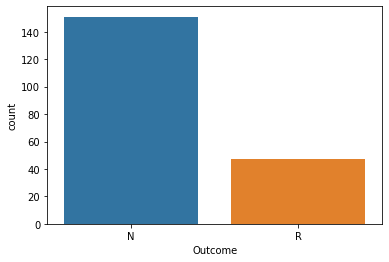

In [6]:
ax=sns.countplot(y)
N,R=y.value_counts()
print('Number of Reccuring: ',R)
print('Number of Non-recurring: ',N)

##  3. Data Exploration

### Violin plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

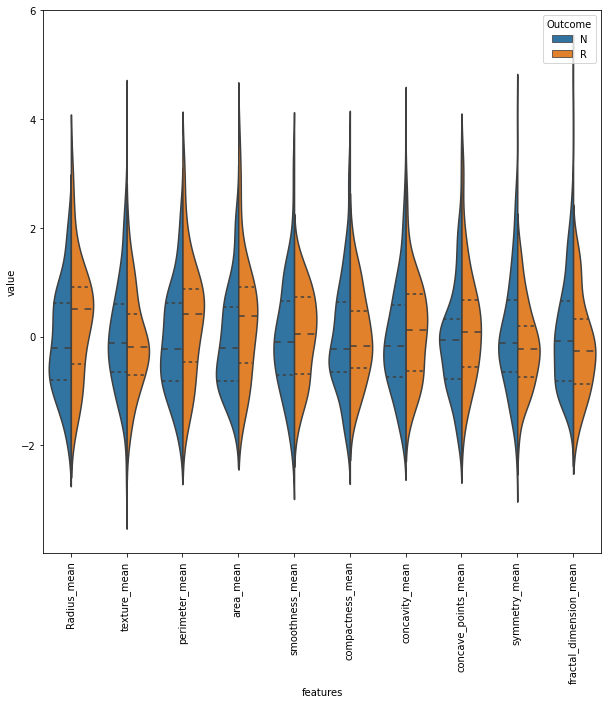

In [7]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization

data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Outcome", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

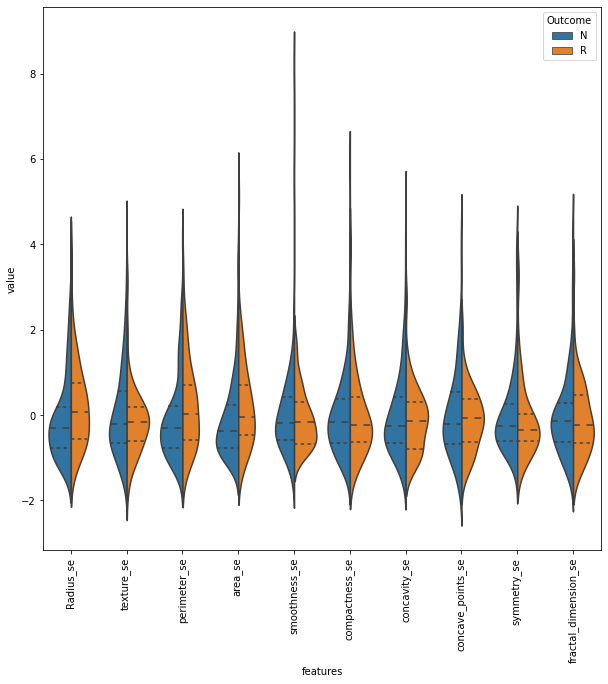

In [8]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Outcome", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

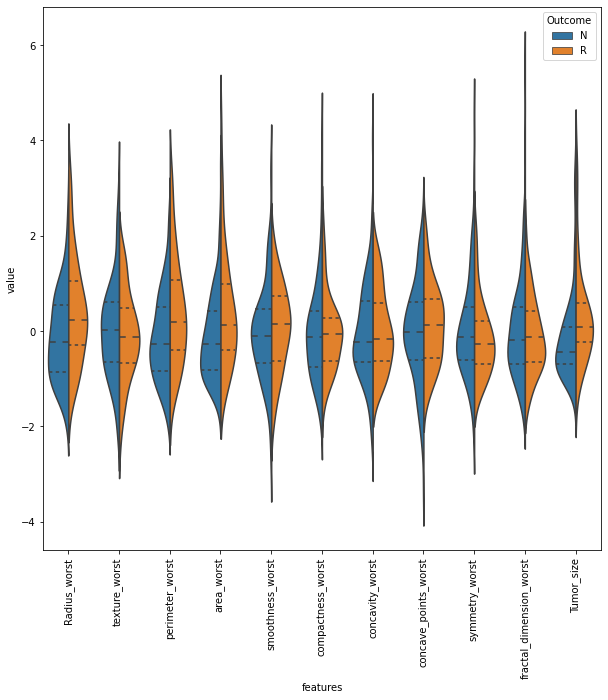

In [9]:
# Last ten features
data = pd.concat([y,data_n_2.iloc[:,20:34]],axis=1)
data = pd.melt(data,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Outcome", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

### Heatmap 


A heatmap is plotted below. It shows the correlation between different attributes in the dataset. Taking the cut-off value as 90%, I've dropped the attributes correlated, keeping only 1 among them. This is done to minimise the number of attributes needed to make the predictions acurately.

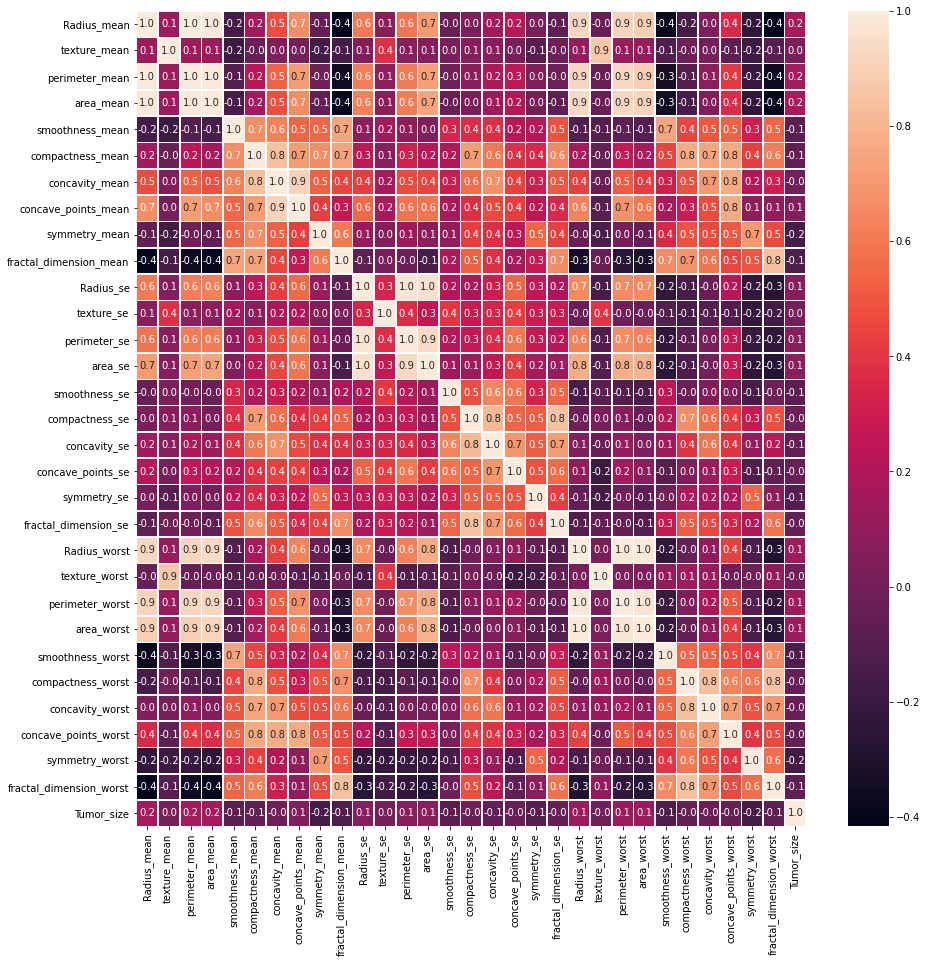

In [10]:
p,plot= plt.subplots(figsize=(15,15))
sns.heatmap(x.corr(),annot=True, linewidths=.5,fmt='.1f',ax=plot)

In [15]:
todrop=['perimeter_mean','area_mean','concave_points_mean','perimeter_se','area_se','Radius_worst','perimeter_worst','area_worst','texture_worst']
b= x.drop(todrop, axis=1)
b.head()

Radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0        18.02         27.60          0.09489            0.1036   
1        17.99         10.38          0.11840            0.2776   
2        21.37         17.44          0.08836            0.1189   
3        11.42         20.38          0.14250            0.2839   
4        20.29         14.34          0.10030            0.1328   

   concavity_mean  symmetry_mean  fractal_dimension_mean  Radius_se  \
0          0.1086         0.1865                 0.06333     0.6249   
1          0.3001         0.2419                 0.07871     1.0950   
2          0.1255         0.2333                 0.06010     0.5854   
3          0.2414         0.2597                 0.09744     0.4956   
4          0.1980         0.1809                 0.05883     0.7572   

   texture_se  smoothness_se  ...  concave_points_se  symmetry_se  \
0      1.8900       0.004433  ...           0.009854      0.01694   
1      0.9053       0.006399  ...           0.015870      0.03003   
2      0.6105       0.006167  ...           0.018050      0.03094   
3      1.1560       0.009110  ...           0.018670      0.05963   
4      0.7813       0.011490  ...           0.018850      0.01756   

   fractal_dimension_se  smoothness_worst  compactness_worst  concavity_worst  \
0              0.003495            0.1195             0.1926           0.3140   
1              0.006193            0.1622             0.6656           0.7119   
2              0.005039            0.1188             0.3449           0.3414   
3              0.009208            0.2098             0.8663           0.6869   
4              0.005115            0.1374             0.2050           0.4000   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  Tumor_size  
0                0.1170          0.2677                  0.08113         5.0  
1                0.2654          0.4601                  0.11890         3.0  
2                0.2032          0.4334                  0.09067         2.5  
3                0.2575          0.6638                  0.17300         2.0  
4                0.1625          0.2364                  0.07678         3.5  

[5 rows x 22 columns]

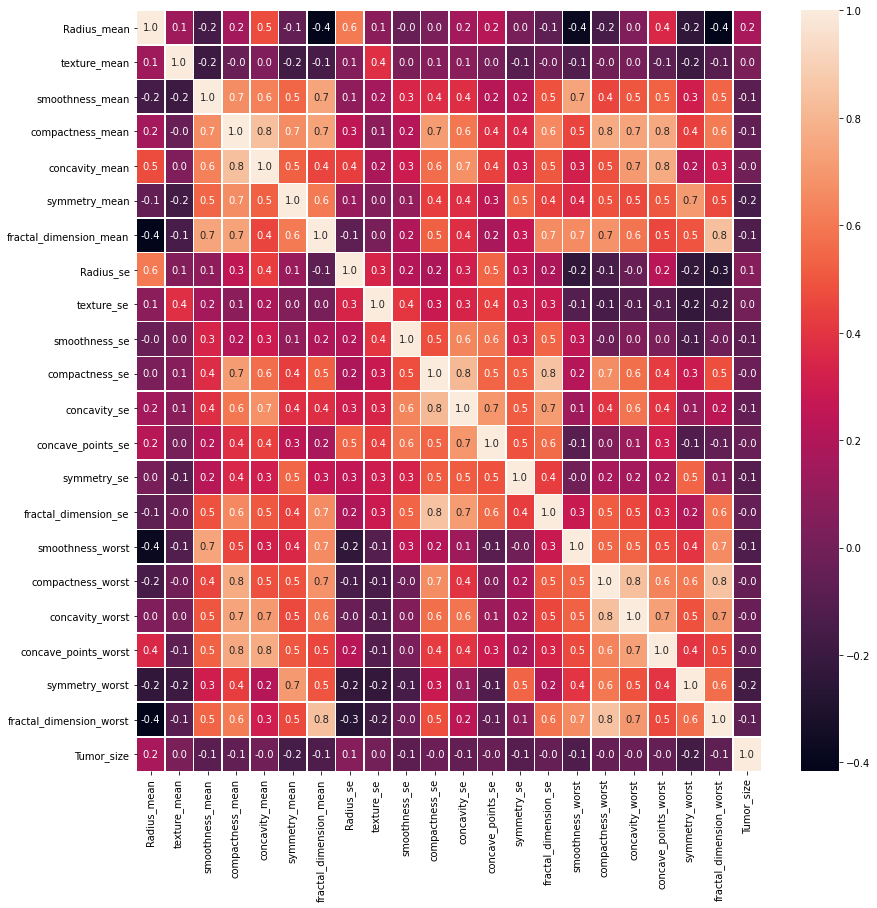

In [16]:
f,plot= plt.subplots(figsize=(14,14))
sns.heatmap(b.corr(),annot=True, linewidths=.5, fmt='.1f',ax=plot)

### Pairplot 

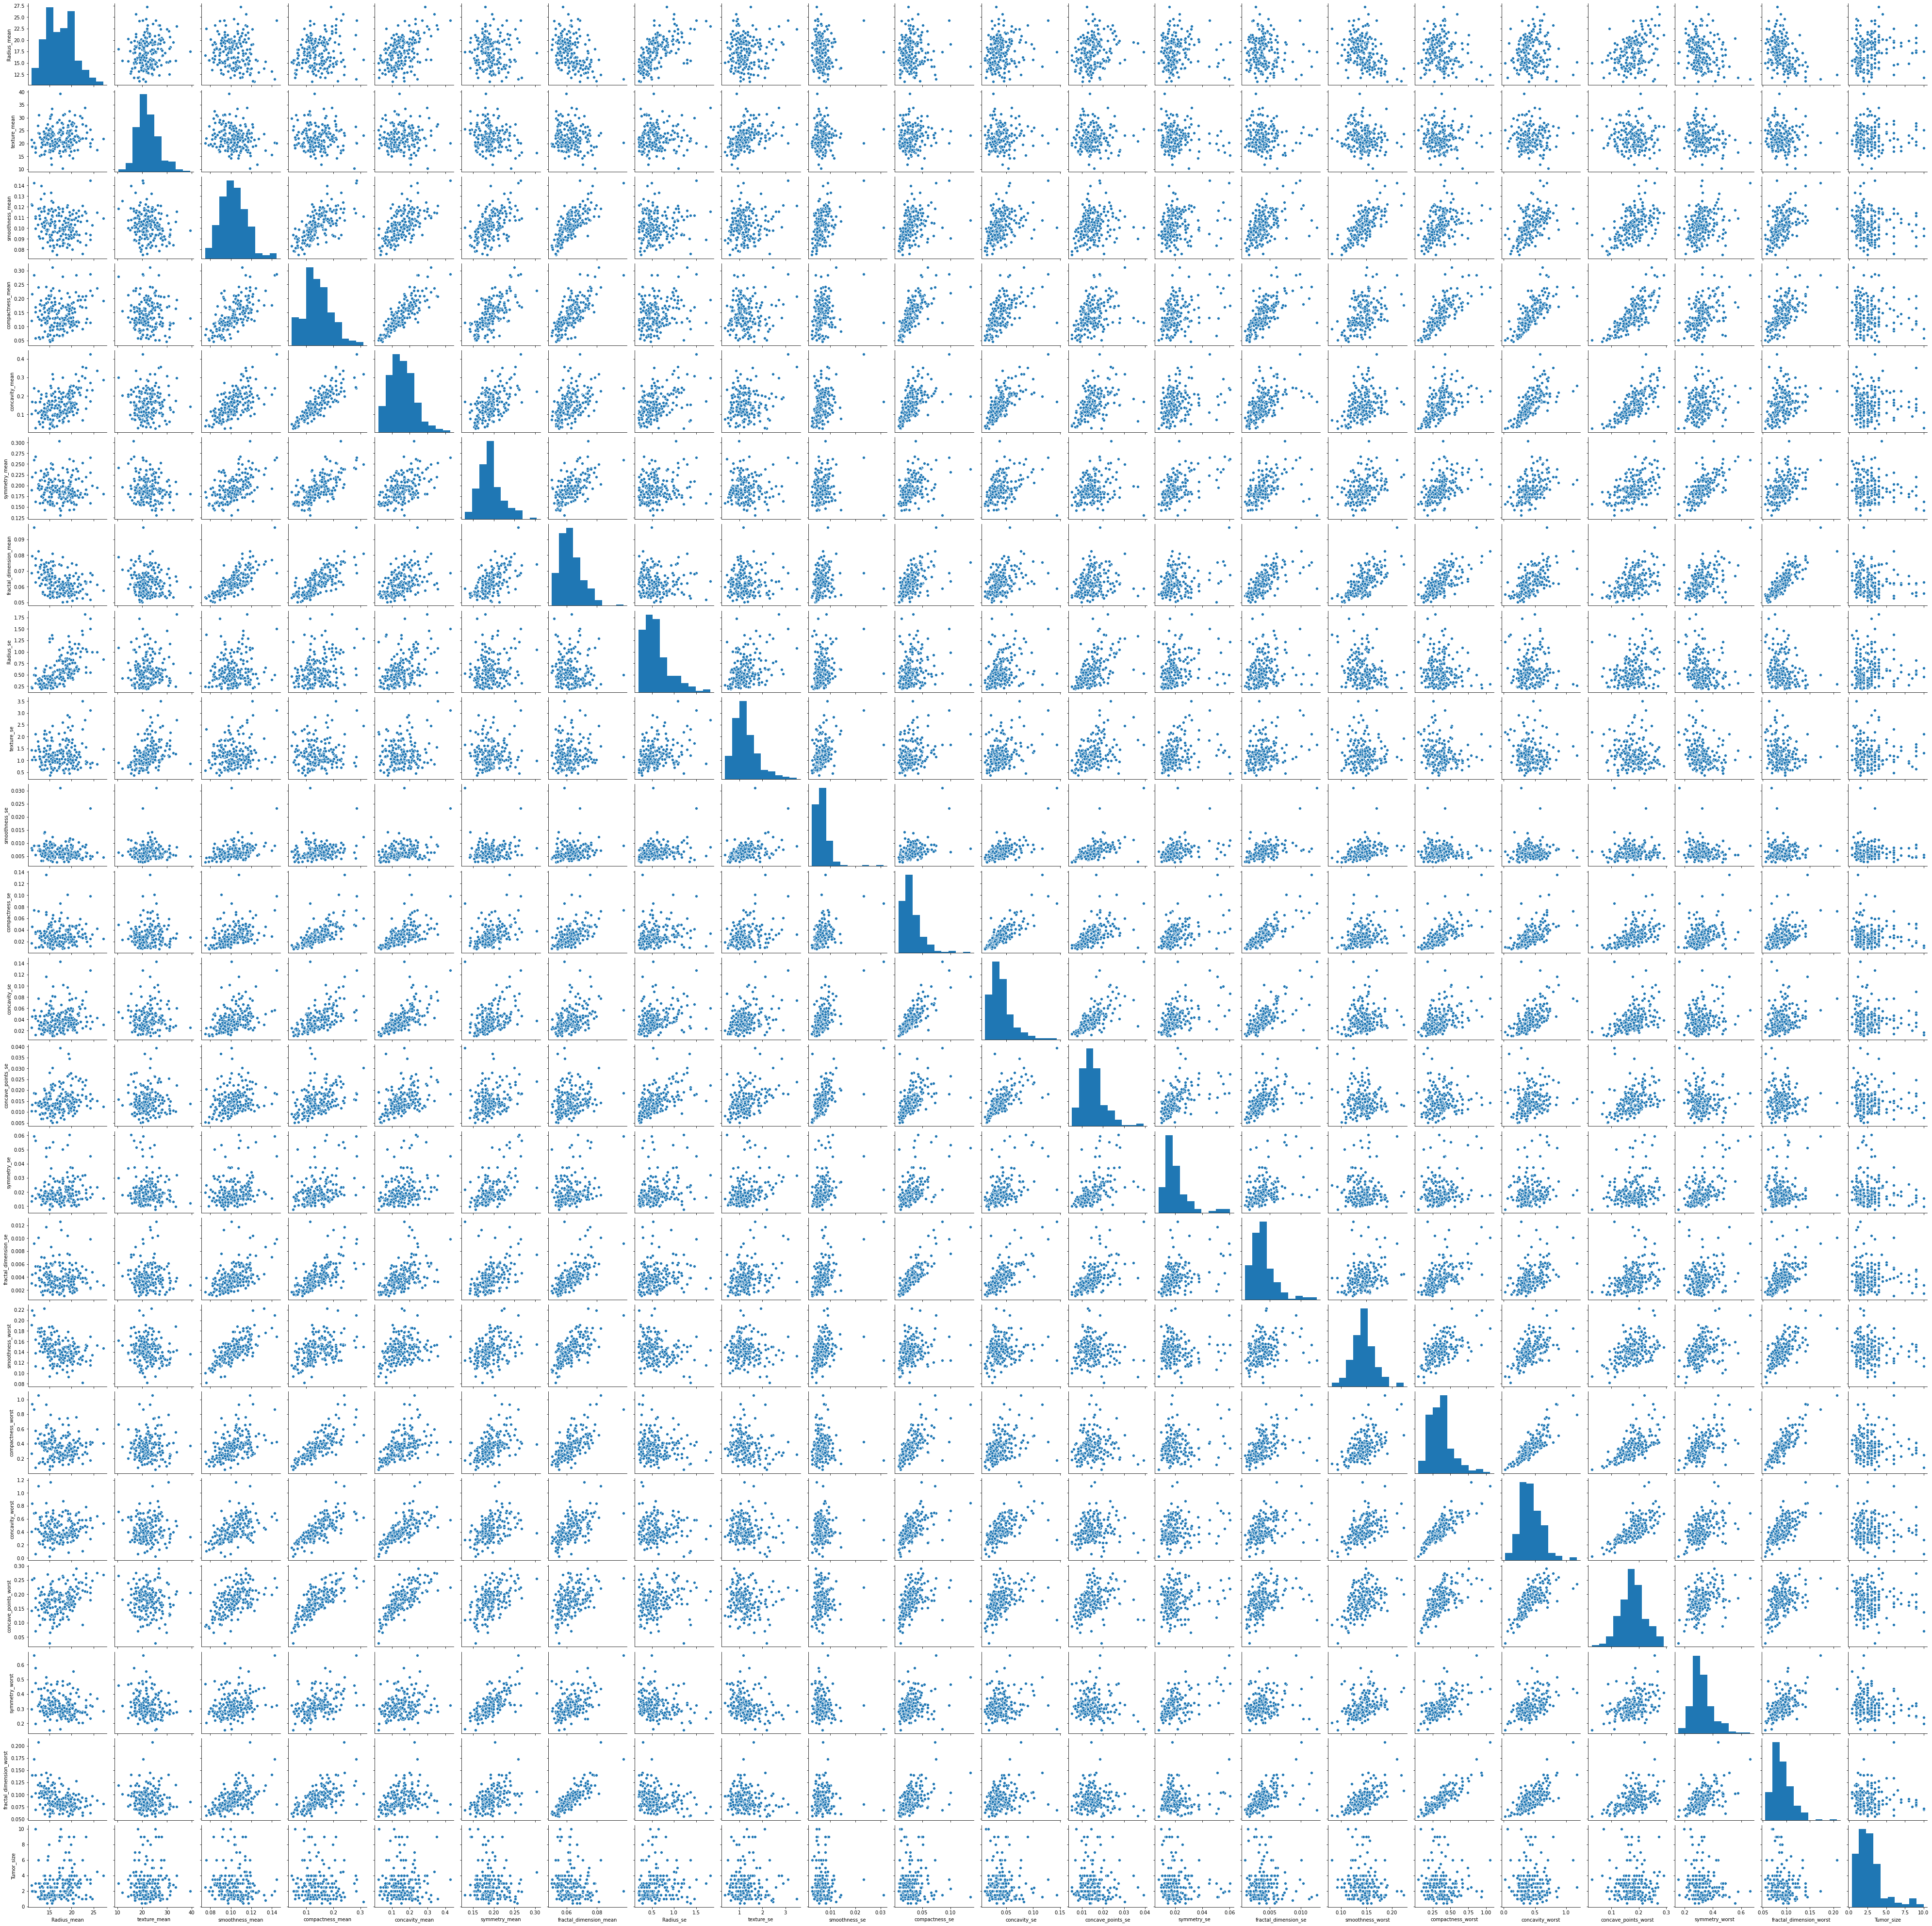

In [14]:
sns.pairplot(b.select_dtypes(include=[np.int, np.float]))

### Boxplot

We can identify the outliers using the boxplot below.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

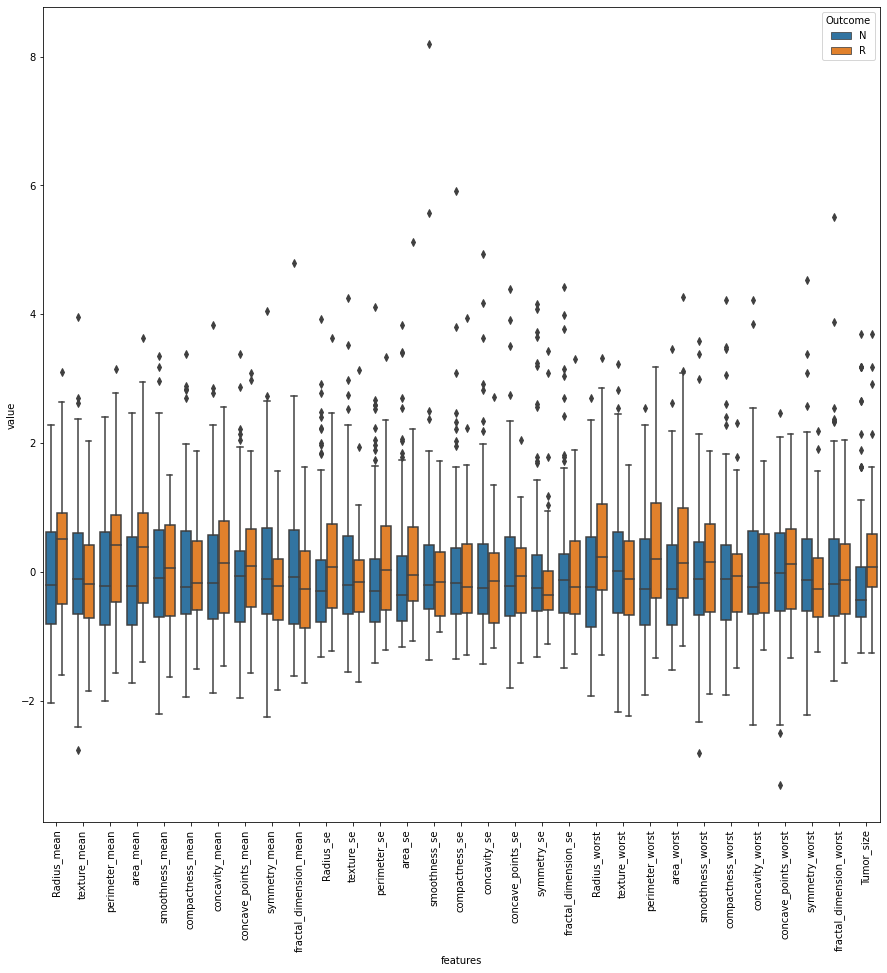

In [17]:
#standardization
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())      

#split the data in 3 parts

data = pd.concat([y,data_n_2],axis=1)
data = pd.melt(data,id_vars="Outcome",var_name="features",value_name='value')
plt.figure(figsize=(15,15))
sns.boxplot(x="features", y="value", hue="Outcome", data=data)
plt.xticks(rotation=90)

### Joint Plot

Since perimeter_se and Radius_se look similar in box plot, we are using joint plot to see whether they are correlated or not.

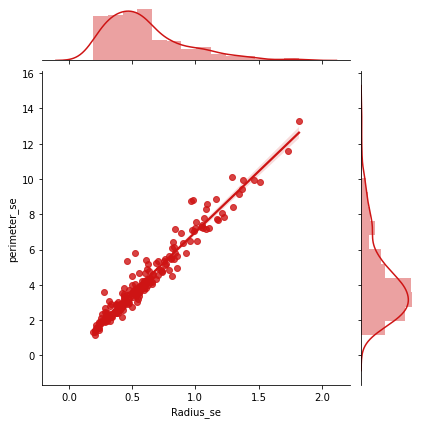

In [18]:
sns.jointplot(x.loc[:,'Radius_se'], x.loc[:,'perimeter_se'], kind="regg", color="#ce1414")

### Swarm Plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

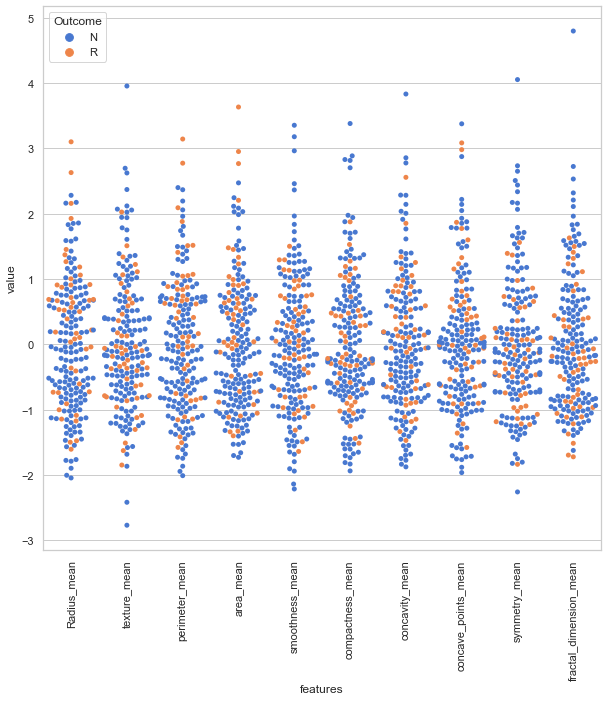

In [19]:
# first ten features
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="Outcome", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

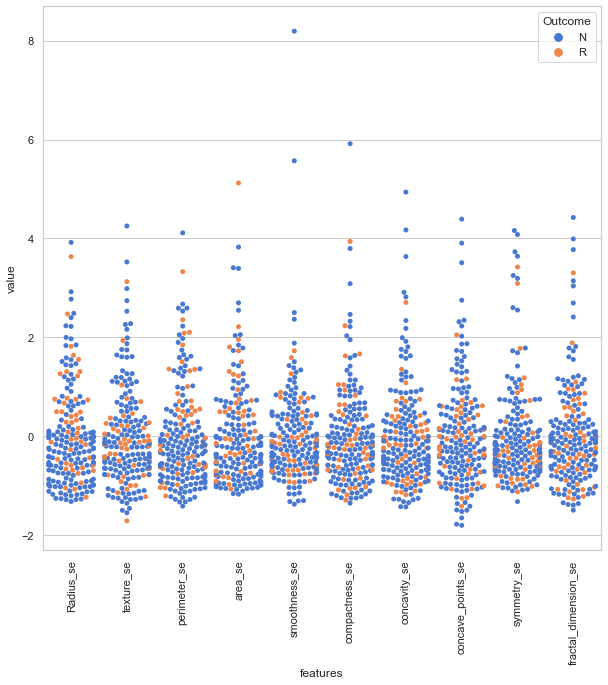

In [20]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Outcome", data=data)
plt.xticks(rotation=90)

swarm plot time:  3.9997360706329346  s


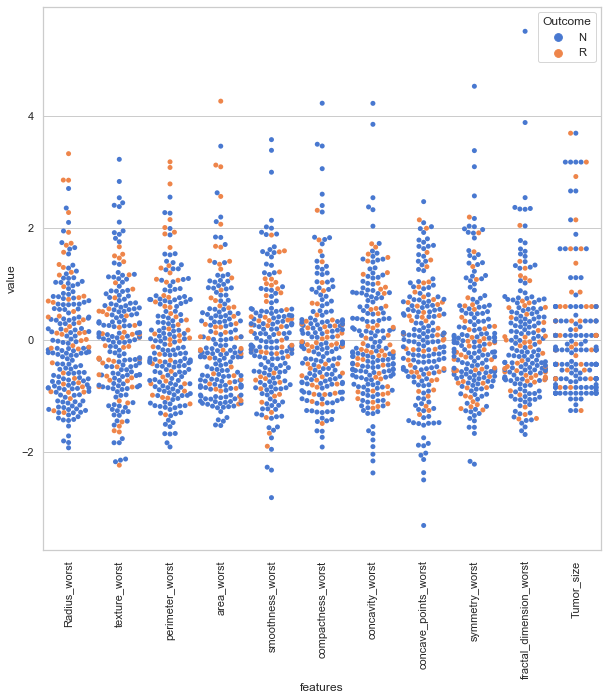

In [21]:
# last ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Outcome", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

## 4. Feature selection and Random Forest Classification

### Finding accuracy using random forest

Accuracy is:  0.8166666666666667


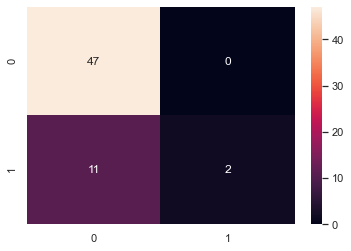

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(b, y, test_size=0.3, random_state=42)

clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [23]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('TPR: %.2f' % TPR)
print('TNR: %.2f' % TNR)

TPR: 0.15
TNR: 1.00


accuracy is almost 81% and as it can be seen in the confusion matrix, there are a few wrong predictions.

In [24]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = clr_rf.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.60


 Training data accuracy:

Accuracy is:  1.0


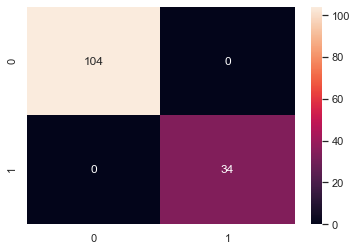

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV

x_train, x_test, y_train, y_test = train_test_split(b, y, test_size=0.3, random_state=42)

clf_rf = RandomForestClassifier(random_state=43)  
clf_rf = RFECV(estimator=clf_rf, step=1, cv=5,scoring='accuracy') #5-fold CV
clr_rf = clf_rf.fit(x_train,y_train)
#Sensitivity = TP/(TP + FN) 
#Specificity = TN/(FP + TN)
#Accuracy = (TP + TN) / (TP + FP + TN + FN) 
ac = accuracy_score(y_train,clf_rf.predict(x_train))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_train,clf_rf.predict(x_train))
sns.heatmap(cm,annot=True,fmt="d")

### Univariate feature selection and random forest classification

SelectKBest removes all but the k highest scoring features


In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 6 features
select_feature = SelectKBest(chi2, k=6).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [1.82793541e+00 8.83132388e-02 7.82449456e-05 6.06394557e-03
 3.56618177e-04 6.76731656e-03 1.92195746e-03 2.99303613e-01
 1.36083258e-01 1.04539894e-03 1.40075404e-04 1.32532689e-02
 1.31439375e-03 1.22914658e-03 2.13232670e-04 8.03474017e-05
 3.46618479e-03 4.32084127e-03 2.79019420e-03 1.25451552e-02
 1.87702532e-03 8.73835600e+00]
Feature list: Index(['Radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'Radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave_points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'Tumor_size'],
      dtype='object')


In [27]:
li=select_feature.scores_
li.sort()
li

array([7.82449456e-05, 8.03474017e-05, 1.40075404e-04, 2.13232670e-04,
       3.56618177e-04, 1.04539894e-03, 1.22914658e-03, 1.31439375e-03,
       1.87702532e-03, 1.92195746e-03, 2.79019420e-03, 3.46618479e-03,
       4.32084127e-03, 6.06394557e-03, 6.76731656e-03, 1.25451552e-02,
       1.32532689e-02, 8.83132388e-02, 1.36083258e-01, 2.99303613e-01,
       1.82793541e+00, 8.73835600e+00])

Best 6 features are Texture mean, tumor size, smoothness worst, smoothness mean, symmetry mean, compactness mean,

In [28]:
from pandas import DataFrame
pd.options.display.float_format='{:.2f}'.format
fs_chi2=DataFrame(select_feature.scores_,columns=["Chi_Square"],index=x_train.columns)
fs_chi2=fs_chi2.reset_index()
fs_chi2=fs_chi2.sort_values('Chi_Square',ascending=0)
fs_chi2

index  Chi_Square
21               Tumor_size        8.74
20  fractal_dimension_worst        1.83
19           symmetry_worst        0.30
18     concave_points_worst        0.14
17          concavity_worst        0.09
16        compactness_worst        0.01
15         smoothness_worst        0.01
14     fractal_dimension_se        0.01
13              symmetry_se        0.01
12        concave_points_se        0.00
11             concavity_se        0.00
10           compactness_se        0.00
9             smoothness_se        0.00
8                texture_se        0.00
7                 Radius_se        0.00
6    fractal_dimension_mean        0.00
5             symmetry_mean        0.00
4            concavity_mean        0.00
3          compactness_mean        0.00
2           smoothness_mean        0.00
1              texture_mean        0.00
0               Radius_mean        0.00

#### Finding accuracy using random forest

Accuracy is:  0.8


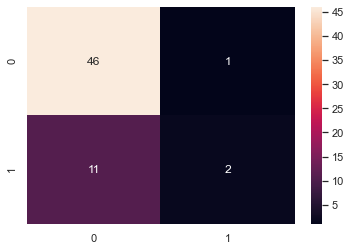

In [29]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [30]:
TN = cm_2[0][0]
FN = cm_2[1][0]
TP = cm_2[1][1]
FP = cm_2[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('TPR: %.2f' % TPR)
print('TNR: %.2f' % TNR)

TPR: 0.15
TNR: 0.98


In [31]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = clr_rf_2.predict_proba(x_test_2)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.53


Training data accuracy:

Accuracy is:  1.0


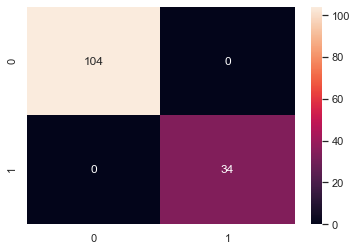

In [39]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

clf_rf_2 = RandomForestClassifier()      
clf_rf_2 = RFECV(estimator=clf_rf_2, step=1, cv=5,scoring='accuracy') #5-fold CV
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_train,clf_rf_2.predict(x_train_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_train,clf_rf_2.predict(x_train_2))
sns.heatmap(cm_2,annot=True,fmt="d")

### Recursive feature elimination (RFE) using random forest classification
It uses one of the classification methods (random forest in our example) to assign weights to all the features. Features having the least absolute weights are pruned from the original set of features. This procedure is recursively repeated on the pruned set until the desired number of features are obtained.

In [40]:
%%capture
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=6, step=1)
rfe = rfe.fit(x_train, y_train)

In [41]:
print('Chosen best 6 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 6 feature by rfe: Index(['Radius_mean', 'Radius_se', 'texture_se', 'concavity_se',
       'smoothness_worst', 'Tumor_size'],
      dtype='object')


#### Finding accuracy using random forest

Accuracy is:  0.7


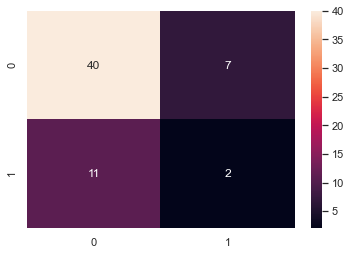

In [51]:
x_train_2 = rfe.transform(x_train)
x_test_2 = rfe.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [43]:
TN = cm_2[0][0]
FN = cm_2[1][0]
TP = cm_2[1][1]
FP = cm_2[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('TPR: %.2f' % TPR)
print('TNR: %.2f' % TNR)

TPR: 0.08
TNR: 0.89


In [45]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = clr_rf_2.predict_proba(x_test_2)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.61


Training data accuracy

Accuracy is:  1.0


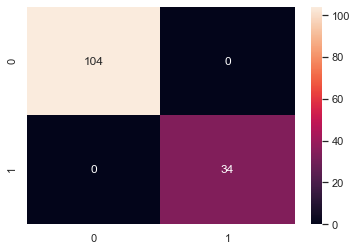

In [46]:
x_train_2 = rfe.transform(x_train)
x_test_2 = rfe.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()    
clf_rf_2 = RFECV(estimator=clf_rf_2, step=1, cv=5,scoring='accuracy') #5-fold CV
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_train,clf_rf_2.predict(x_train_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_train,clf_rf_2.predict(x_train_2))
sns.heatmap(cm_2,annot=True,fmt="d")

### Recursive feature elimination with cross validation and random forest classification

In [47]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 13
Best features : Index(['Radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'Radius_se', 'texture_se', 'concavity_se',
       'fractal_dimension_se', 'smoothness_worst', 'concave_points_worst',
       'symmetry_worst', 'Tumor_size'],
      dtype='object')


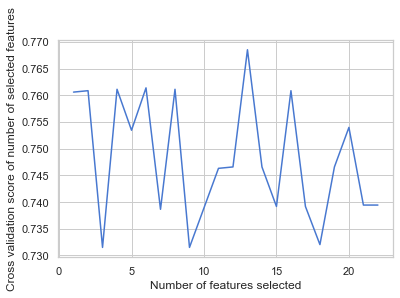

In [48]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Finding accuracy using random forest

Accuracy is:  0.8


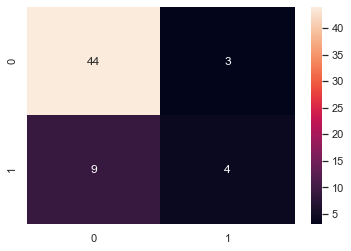

In [49]:
x_train_2 = rfecv.transform(x_train)
x_test_2 = rfecv.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [50]:
TN = cm_2[0][0]
FN = cm_2[1][0]
TP = cm_2[1][1]
FP = cm_2[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('TPR: %.2f' % TPR)
print('TNR: %.2f' % TNR)

TPR: 0.31
TNR: 0.94


In [53]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = clr_rf_2.predict_proba(x_test_2)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.58


Training data accuracy

Accuracy is:  1.0


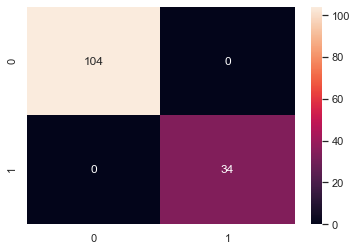

In [55]:
x_train_2 = rfecv.transform(x_train)
x_test_2 = rfecv.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()    
clf_rf_2 = RFECV(estimator=clf_rf_2, step=1, cv=5,scoring='accuracy') #5-fold CV
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_train,clf_rf_2.predict(x_train_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_train,clf_rf_2.predict(x_train_2))
sns.heatmap(cm_2,annot=True,fmt="d")

### Tree based feature selection and random forest classification

Feature ranking:
1. feature 11 (0.077069)
2. feature 21 (0.069198)
3. feature 0 (0.062836)
4. feature 7 (0.059578)
5. feature 12 (0.047662)
6. feature 5 (0.047591)
7. feature 8 (0.046105)
8. feature 13 (0.045802)
9. feature 6 (0.045471)
10. feature 20 (0.045009)
11. feature 17 (0.044731)
12. feature 4 (0.043403)
13. feature 15 (0.042546)
14. feature 2 (0.040377)
15. feature 10 (0.039849)
16. feature 19 (0.036082)
17. feature 9 (0.036062)
18. feature 16 (0.035740)
19. feature 14 (0.034833)
20. feature 1 (0.033925)
21. feature 3 (0.033364)
22. feature 18 (0.032766)


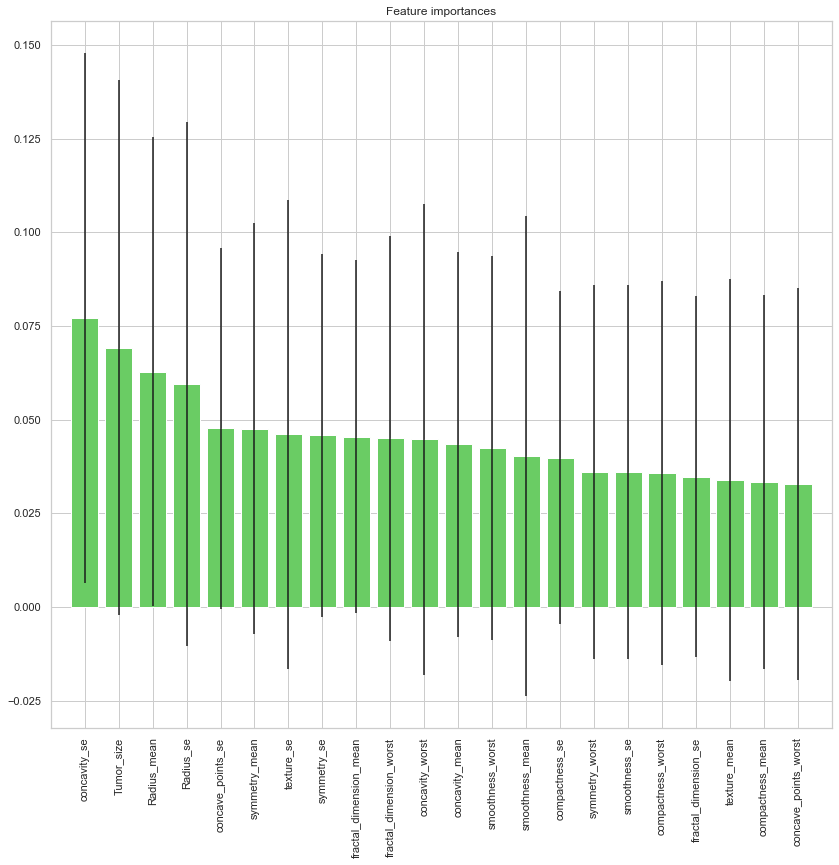

In [56]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x_train, y_train)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(x_train) 

Accuracy is:  0.7


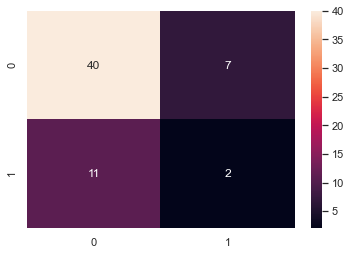

In [59]:
x_train_2 = model.transform(x_train)
x_test_2 = model.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clf_rf_2 = RFECV(estimator=clf_rf_2, step=1, cv=5,scoring='accuracy')
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [60]:
TN = cm_2[0][0]
FN = cm_2[1][0]
TP = cm_2[1][1]
FP = cm_2[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('TPR: %.2f' % TPR)
print('TNR: %.2f' % TNR)

TPR: 0.15
TNR: 0.85


In [61]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = clr_rf_2.predict_proba(x_test_2)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.53


Training data accuracy

Accuracy is:  1.0


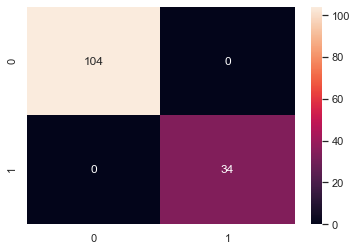

In [62]:
x_train_2 = model.transform(x_train)
x_test_2 = model.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clf_rf_2 = RFECV(estimator=clf_rf_2, step=1, cv=5,scoring='accuracy')
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_train,clf_rf_2.predict(x_train_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_train,clf_rf_2.predict(x_train_2))
sns.heatmap(cm_2,annot=True,fmt="d")

### L1-based feature selection

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Set the regularization parameter C=1
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=7).fit(x_train, y_train)
model = SelectFromModel(logistic, prefit=True)

x_new = model.transform(x_train)
x_new

array([[19.77  ,  0.2895,  1.851 ,  0.4   ],
       [30.62  ,  0.2602,  1.205 ,  2.5   ],
       [18.66  ,  0.2871,  0.8937,  1.    ],
       [20.82  ,  0.213 ,  0.5914,  2.5   ],
       [19.08  ,  0.2959,  0.679 ,  1.5   ],
       [28.08  ,  0.4564,  1.075 ,  3.5   ],
       [21.59  ,  0.4226,  1.15  ,  6.5   ],
       [20.58  ,  0.5449,  0.9225,  1.2   ],
       [20.46  ,  0.8215,  1.26  ,  2.1   ],
       [26.47  ,  0.5558,  0.6062,  3.5   ],
       [23.21  ,  0.6107,  2.836 ,  4.    ],
       [25.56  ,  0.5296,  1.667 ,  1.5   ],
       [39.28  ,  0.5366,  0.8561,  2.    ],
       [17.44  ,  0.5854,  0.6105,  2.5   ],
       [15.79  ,  0.2787,  0.6205,  3.    ],
       [21.9   ,  1.008 ,  0.6999,  3.    ],
       [29.19  ,  0.6101,  1.425 ,  3.7   ],
       [25.74  ,  0.6534,  1.506 ,  2.6   ],
       [21.81  ,  0.1938,  0.6123,  1.7   ],
       [18.87  ,  0.4041,  0.5503,  2.    ],
       [25.27  ,  0.439 ,  1.012 ,  2.    ],
       [25.42  ,  0.51  ,  1.679 ,  9.    ],
       [21

In [64]:
selected_features = pd.DataFrame(model.inverse_transform(x_new), 
                                 index=x_train.index,
                                 columns=x_train.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]
selected_columns

Index(['texture_mean', 'Radius_se', 'texture_se', 'Tumor_size'], dtype='object')

#### Finding accuracy using random forest

Accuracy is:  0.75


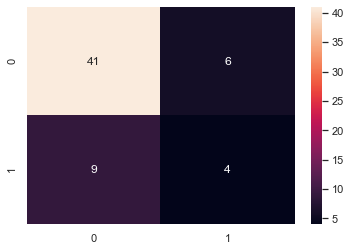

In [66]:
x_train_2 = model.transform(x_train)
x_test_2 = model.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [67]:
TN = cm_2[0][0]
FN = cm_2[1][0]
TP = cm_2[1][1]
FP = cm_2[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('TPR: %.2f' % TPR)
print('TNR: %.2f' % TNR)

TPR: 0.31
TNR: 0.87


In [68]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = clr_rf_2.predict_proba(x_test_2)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.71


Training data accuracy

Accuracy is:  1.0


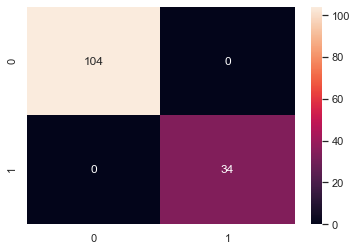

In [69]:
x_train_2 = model.transform(x_train)
x_test_2 = model.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clf_rf_2 = RFECV(estimator=clf_rf_2, step=1, cv=5,scoring='accuracy')
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_train,clf_rf_2.predict(x_train_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_train,clf_rf_2.predict(x_train_2))
sns.heatmap(cm_2,annot=True,fmt="d")

# Conclusion:


We saw various accuracies by deploying the different feature selection techniques. We got the best result from the correlation map, which gave an 81.66% accuracy rate. The correlated elements that were dropped to achieve the accuracy were 'perimeter_mean','area_mean','concave_points_mean','perimeter_se','area_se','Radius_worst','perimeter_worst','area_worst','texture_worst'. 